In [1]:
import pandas as pd
import numpy as np
# Set pandas print value to show decimals upto 4 places
np.set_printoptions(precision=4, linewidth=100)

In [2]:
mba_salary= pd.read_csv('MBA Salary.csv') # loading the data set into dataframe
mba_salary.head(7) # getting the top 7 rows of the dataframe

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000


In [3]:
mba_salary.info() # getting more information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [4]:
### Creating feature set x and outcome variable y
import statsmodels.api as sm #to build models #ols api is used for estimation of parameters for simple linear regression
X= sm.add_constant(mba_salary['Percentage in Grade 10'])
X.head()

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [5]:
Y=mba_salary['Salary']

In [6]:
# Splitting the dataset into training and validation sets
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split (X,
                                                    Y,
                                                    train_size=0.8,
                                                    random_state=100)

In [7]:
## Fitting the model
mba_salary_lm=sm.OLS(train_y,train_X).fit()

In [8]:
# Estimated parameters
print(mba_salary_lm.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [9]:
# the estimated salary model can be written as
# salary= 30587.285652 + 3560.587383 * Percentage in Grade 10

In [10]:
# Regression model summary using Python
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2022-07-23 12:52      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

In [11]:
##the r-squared value is .211 which means that the model explains 21.1% of the variation in salary
## the p value for t test is 0.0029 which is less than 0.05 which means there is 
# statistically significant relationship between percentage in grade 10 and salary
## the p value for the f statistic is 0.00287 which indicates that the overall model is 
# statistically significant
## p value for t and f test will be same in linear regression as the hypothesis is same for both 

In [12]:
## Residual Analysis
# Checking for normal distribution of residuals
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 

<Figure size 576x432 with 0 Axes>

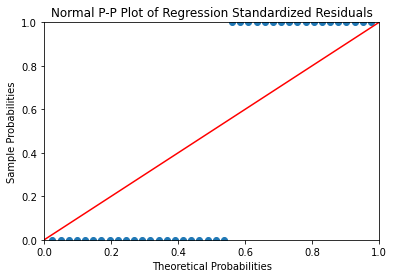

In [13]:
mba_salary_resid = mba_salary_lm.resid 
probplot = sm.ProbPlot( mba_salary_resid ) 
plt.figure( figsize = (8, 6) ) 
probplot.ppplot( line='45' ) 
plt.title( "Normal P-P Plot of Regression Standardized Residuals" ) 
plt.show() 

In [14]:
# Test for homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/ vals.std()

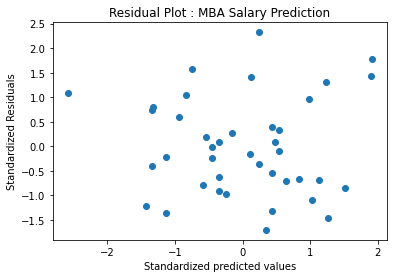

In [15]:
plt.scatter( get_standardized_values(mba_salary_lm.fittedvalues ),
            get_standardized_values(mba_salary_resid))
plt. title("Residual Plot : MBA Salary Prediction");
plt.xlabel("Standardized predicted values")
plt.ylabel("Standardized Residuals");

In [16]:
# since the residuals are random and have no funnel shape, it means that they have constant variance

In [17]:
# Outliers analysis
# Z-score
from scipy.stats import zscore

In [18]:
mba_salary['z_score_salary'] = zscore( mba_salary.Salary )
mba_salary[ (mba_salary.z_score_salary > 3.0) | (mba_salary.z_score_salary < -3.0) ] 

,S. No.,Percentage in Grade 10,Salary,z_score_salary


In [19]:
# it shows that there are no outliers as per z-score

In [20]:
## Making prediction and measuring accuracy
pred_y= mba_salary_lm.predict( test_X )

In [21]:
# Measuring accuracy of the prediction
# Finding R-sq and RMSE
from sklearn.metrics import r2_score, mean_squared_error
np.abs(r2_score(test_y, pred_y))

0.15664584974230378

In [22]:
# the model explains 15.6% of the variance in the test set

In [23]:
np.sqrt(mean_squared_error(test_y, pred_y))

73458.04348346894

In [24]:
# Calculating prediction intervals
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# predict the y values
pred_y = mba_salary_lm.predict( test_X ) 
# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( mba_salary_lm, 
test_X, 
alpha = 0.1) 
# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { 'grade_10_perc': test_X['Percentage in Grade 10'], 
'pred_y': pred_y, 
'pred_y_left': pred_y_low, 
'pred_y_right': pred_y_high } ) 
pred_y_df[0:10] 


,grade_10_perc,pred_y,pred_y_left,pred_y_right
6,70.0,279828.402452,158379.832044,401276.972860
36,68.0,272707.227686,151576.715020,393837.740352
37,52.0,215737.829560,92950.942395,338524.716726
28,58.0,237101.353858,115806.869618,358395.838097
43,74.5,295851.045675,173266.083342,418436.008008
49,60.8,247070.998530,126117.560983,368024.436076
5,55.0,226419.591709,104507.444388,348331.739030
33,78.0,308313.101515,184450.060488,432176.142542
20,63.0,254904.290772,134057.999258,375750.582286
42,74.4,295494.986937,172941.528691,418048.445182
